## Inspect RXN annotations

In [2]:
import json

with open("../annotations.json", "r") as f:
    annotations = json.load(f)

In [3]:
annotations.keys()

dict_keys(['licenses', 'info', 'categories', 'images', 'roles'])

In [4]:
from IPython.display import Image, display
from collections import defaultdict
import pprint
pp = pprint.PrettyPrinter(indent=4, compact=True)

bbox_cat_map = {c["id"]:c["name"] for c in annotations["categories"]}

def inspect(idx):
    img = annotations["images"][idx]
    
    vis_path = f"../visualizations/{img['file_name']}".replace(".png", "_result.png")
    display(Image(filename=vis_path, width=700))
    
    bboxes = img["bboxes"]
    cat_to_bboxes = defaultdict(list)
    for bbox in bboxes:
        cat_to_bboxes[bbox_cat_map[bbox["category_id"]]].append(bbox["id"])
    print(f"BBoxes: \n{dict(cat_to_bboxes)}")
    
    reactions = {i: rxn for i, rxn in enumerate(img["reactions"])}
    print(f"Reactions: \n{reactions}")
    
    corefs = img["corefs"]
    print(f"Structure-Identifier coreferences: \n{corefs}")

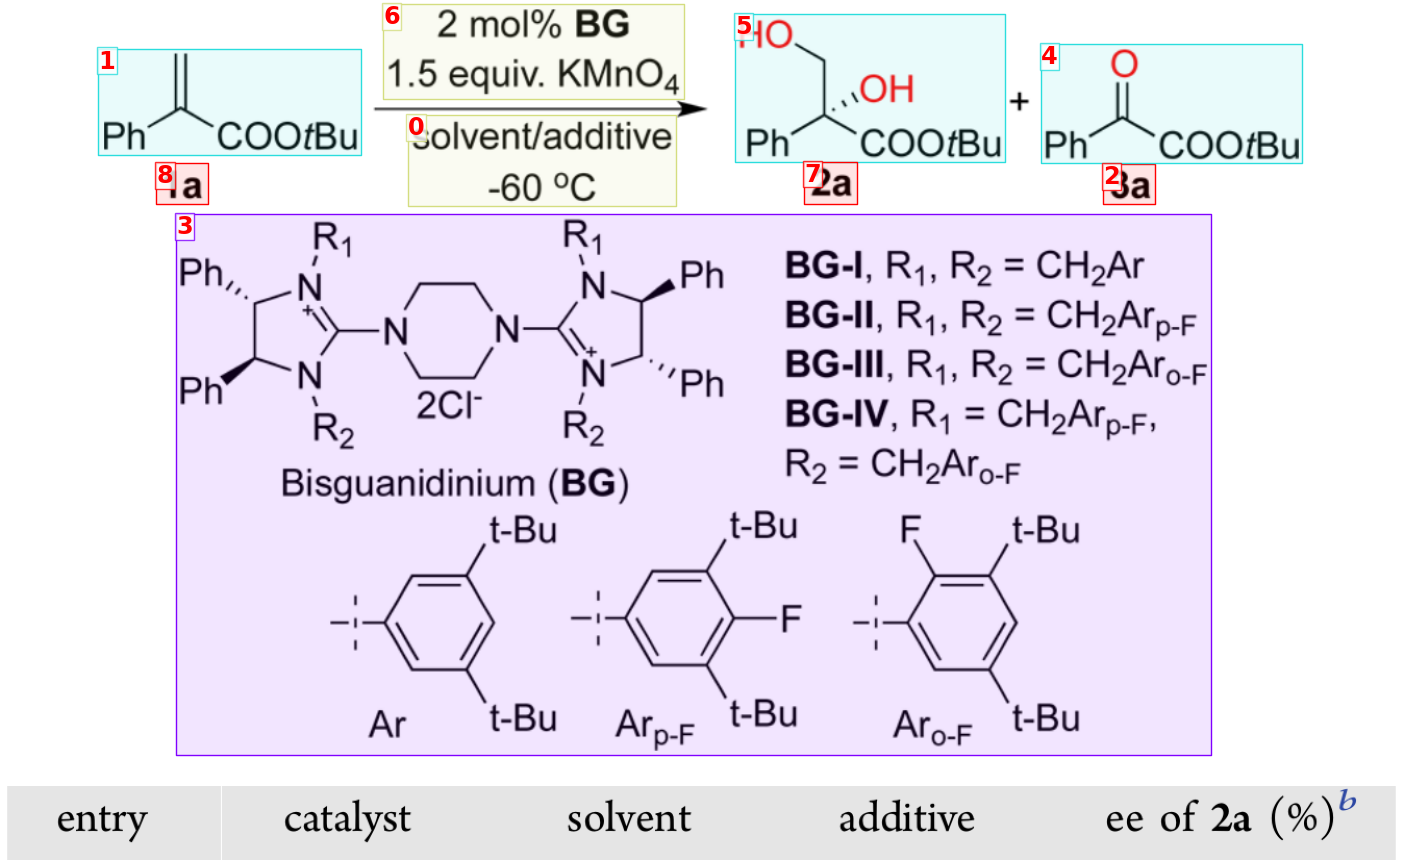

BBoxes: 
{'text': [0, 6], 'structure': [1, 4, 5], 'identifier': [2, 7, 8], 'supplement': [3]}
Reactions: 
{0: {'reactants': [1], 'conditions': [6, 0], 'products': [5, 4]}}
Structure-Identifier coreferences: 
[[1, 8], [5, 7], [4, 2]]


In [10]:
inspect(6)

In [6]:
# Data statistics

# Number of reactions
num_bboxes = [len(img["bboxes"]) for img in annotations["images"]]
num_reactions = [len(img["reactions"]) for img in annotations["images"]]
num_corefs = [len(img["corefs"]) for img in annotations["images"]]

print(f"BBoxes: {sum(num_bboxes)}")
print(f"Reactions: {sum(num_reactions)}")
print(f"Struct-Identifier Coreferences: {sum(num_corefs)}")

BBoxes: 10676
Reactions: 1520
Struct-Identifier Coreferences: 3085


<AxesSubplot:ylabel='Count'>

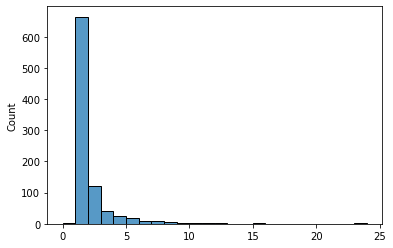

In [11]:
import seaborn as sns

sns.histplot(num_reactions, binwidth=1)

<AxesSubplot:ylabel='Count'>

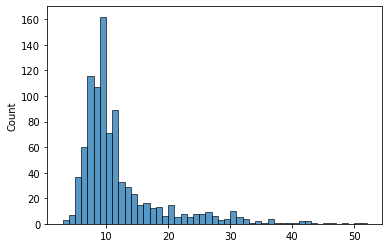

In [12]:
sns.histplot(num_bboxes, binwidth=1)

<AxesSubplot:ylabel='Count'>

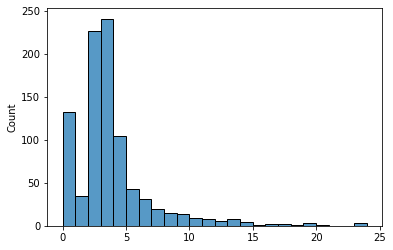

In [13]:
sns.histplot(num_corefs, binwidth=1)

In [15]:
# Statistics for each split

for split in ["train", "dev", "test"]:
    with open(f"../splits/{split}.json", "r") as f:
        data = json.load(f)
    print(f"SET: {split}")
    num_bboxes = [len(img["bboxes"]) for img in data["images"]]
    num_reactions = [len(img["reactions"]) for img in data["images"]]
    num_corefs = [len(img["corefs"]) for img in data["images"]]

    print(f"  Images: {len(data['images'])}")
    print(f"  BBoxes: {sum(num_bboxes)}")
    print(f"  Reactions: {sum(num_reactions)}")
    print(f"  Struct-Identifier Coreferences: {sum(num_corefs)}")


SET: train
  Images: 728
  BBoxes: 8605
  Reactions: 1209
  Struct-Identifier Coreferences: 2479
SET: dev
  Images: 91
  BBoxes: 1013
  Reactions: 175
  Struct-Identifier Coreferences: 284
SET: test
  Images: 92
  BBoxes: 1058
  Reactions: 136
  Struct-Identifier Coreferences: 322
